# 3D histogramming
This is the same as the 2D histogramming version except that an extra dimension has been added to the detector.
(2D area detector as opposed to 1D detector)

The essential component of the histogram object is again just two lines:
- h = Histogram((Nh,0,mu0*3),(Nx,0,Nx),(Ny,0,Ny))
- h.fill(channelvals,channelindsx,channelindsy)


The rest are just details.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time as ttime


%matplotlib notebook

from skxray.core.accumulators.histogram import Histogram

<IPython.core.display.Javascript object>


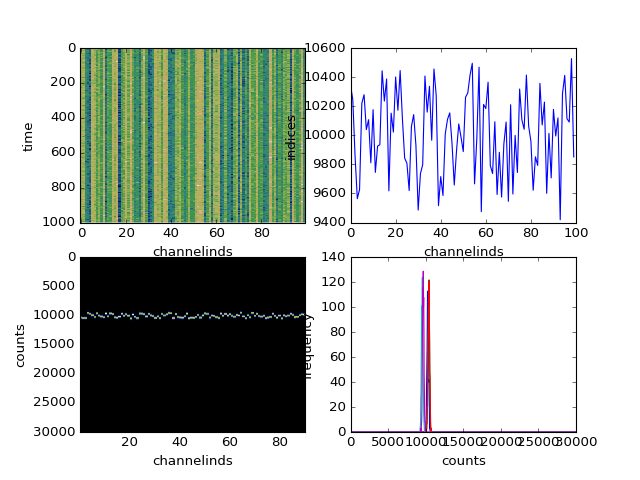

In [3]:
# set up the figure
fig,((ax0,ax1),(ax2,ax3)) = plt.subplots(nrows=2,ncols=2)

In [4]:
# numer of repeats (number of images to capture)
N = 1000
# number of channels per dimension, a 10 x 10 pixel detector here
Nx = 10
Ny = 10

#avg intensity
mu0 = 1e4

# percentage deviation of average count rate from pixel to pixel
ffielddev = .1


Nh = 1000#3*mu0
# binning trick to ensure 1 to 1 mapping between channels (we only
# histogram the counts)
channelindsx = np.tile(np.arange(Nx),(Ny,1)).reshape(-1)
channelindsy = np.tile(np.arange(Ny)[:,np.newaxis],(1,Nx)).reshape(-1)

# initialize histogram object
h = Histogram((Nh,0,mu0*3),(Nx,0,Nx),(Ny,0,Ny))

# Image generator
def gen2d(N, Nx, Ny, mu0):
    ''' Generate a sequence of images.'''
    channelvals = np.ones((Nx, Ny))
    # flatfield 
    flatfield = 1 + (np.random.random((Nx,Ny))-.5)*ffielddev
    for i in range(N):
        yield np.random.poisson(mu0*channelvals*flatfield).astype(float).reshape(-1)

# for waterfall plot
img = np.zeros((N, Nx*Ny))
extent=[h.centers[1][0]*h.centers[2][0],h.centers[1][-1]*h.centers[2][-1],h.centers[0][-1],h.centers[0][0]]

In [5]:
# looping through data
for i, channelvals in enumerate(gen2d(N,Nx,Ny,mu0)):
    # histogram, one command
    h.fill(channelvals,channelindsx,channelindsy)
    img[i] = channelvals.reshape(-1)

    # waterfall plot (collapse 2d detector into 1d)
    ax0.cla();
    ax0.imshow(img)#.reshape((N,Nx*Ny)))
    ax0.set_xlabel("channelinds")
    ax0.set_ylabel("time")
    
    # the instantaneous counts
    ax1.cla();
    ax1.plot(channelindsx + Nx*channelindsy,channelvals.reshape(-1))
    ax1.set_xlabel("channelinds")
    ax1.set_ylabel("indices")
    
    # The histogram as 2d image 
    ax2.cla();
    ax2.imshow(h.values.reshape((Nh,Nx*Ny)),extent=extent)
    ax2.set_ylabel("counts")
    ax2.set_xlabel("channelinds")

    # plot a few sample histograms
    ax3.cla();
    for j in range(5):
        ax3.plot(h.centers[0], h.values.reshape((Nh,Nx*Ny))[:,j])
    ax3.set_xlabel("counts");
    ax3.set_ylabel("frequency");

    fig.canvas.draw()
    ttime.sleep(0.001)
